In [2]:
import pandas as pd
import glob 
from matplotlib import pyplot as plt 
from pathlib import Path
import datetime as dt
plt.style.use('ggplot')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = '/home/satyukt/Projects/5020_1/data/1st batch of farm data july to oct 16/*/report.csv'

In [5]:
file_path = glob.glob(path)

In [6]:
def dt_fi(x):
    dd = dt.datetime.strptime(x.split(',')[0], '%B %d').strftime('%b %d')
    return dd

In [7]:
df2 = pd.read_csv('/home/satyukt/Projects/5020_1/data/info_1.csv')

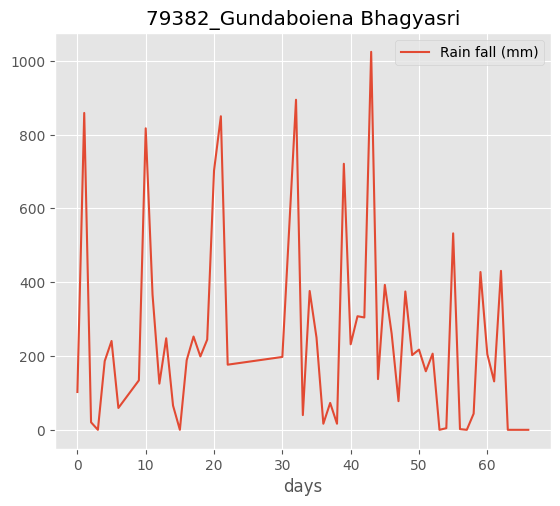

In [24]:
['Rain fall (mm)', 'Temperature (°C)', 'Humidity (%)']


plot = 'scatter1'

parameter = 'Rain fall (mm)'
grou = 'sum'
fig, ax = plt.subplots(figsize = (6.4, 5.4))
for fil in file_path:
    
    name = Path(fil).parent.stem
    
    df = pd.read_csv(fil)
    
    df['Datetime'] = pd.to_datetime(df['Date time (time zone: Asia/Kolkata)'])
    df.reset_index(drop=True, inplace=True)
    
    df['days'] = [(x - df['Datetime'][0]).days for x in df['Datetime']]
    
    df = df.loc[df[parameter]!='-']
    df[parameter] = df[parameter].astype(float)
    
    
    if parameter == 'Rain fall (mm)':
        df = df.groupby('days').sum()
    else:
        df = df.groupby('days').mean()
        
    df = df.reset_index()
   
    
    if df.days.max() > 60:
    
        if plot == 'scatter':
            df.plot.scatter('days', parameter, ax = ax)
        else:
            df.plot('days', parameter, ax = ax)

        plt.title(name)
        
        break


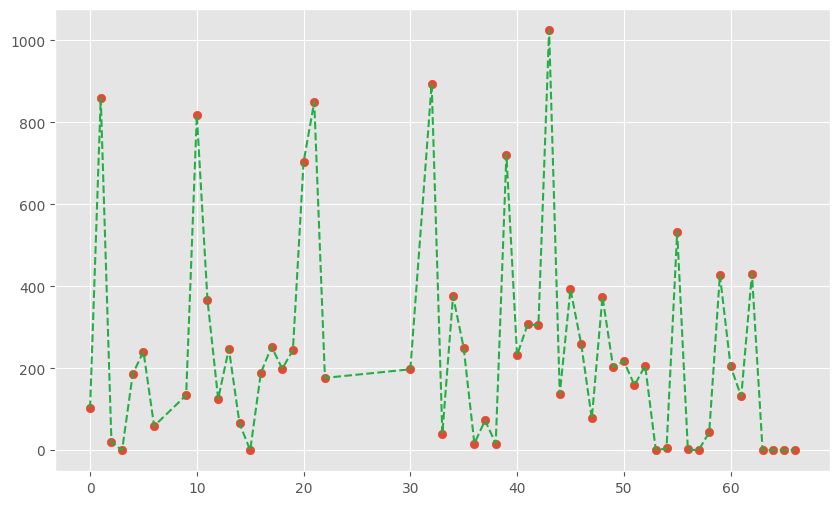

In [25]:
fig, ax = plt.subplots(figsize = (10,6), facecolor = 'white')
ax.scatter(df['days'], df['Rain fall (mm)'])
ax.plot(df['days'], df['Rain fall (mm)'], color='#23af45', linestyle='--')
# ax.plot(df['days'], df['Temperature (°C)'])
# ax.plot(df['days'], df['Humidity (%)'])
# ax.legend()